In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


**Import các thư viện cần thiết**

In [ ]:
# Tắt những cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Thư viện số học và đại số tuyến tính trong Python
import numpy as np

# Thư viện cung cấp cấu trúc dữ liệu và công cụ phân tích dữ liệu
import pandas as pd

# Thư viện đồ họa thống kê dựa trên matplotlib, giúp tạo các biểu đồ một cách dễ dàng và đẹp mắt
import seaborn as sns

# Thư viện vẽ đồ thị và biểu đồ
import matplotlib.pyplot as plt

# Các hàm thống kê cho việc tính toán các hệ số tương quan và kiểm định thống kê
import scipy.stats as stats
from scipy.stats import norm, shapiro, chi2_contingency, kendalltau
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu, kruskal

# Thư viện tạo đồ thị tương tác và biểu đồ
import plotly.express as px

# Cung cấp mô hình thống kê và kiểm định trong Python
import statsmodels.api as sm

# Chứa các công cụ chuẩn hóa và tiền xử lý dữ liệu trong scikit-learn
from sklearn import preprocessing as pp
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Dùng để vẽ biểu đồ mosaic
from statsmodels.graphics.mosaicplot import mosaic

# Cung cấp công cụ để phát triển và đánh giá mô hình tuyến tính
from statsmodels.formula.api import ols

# Thực hiện kiểm định Tukey HSD cho so sánh đôi chiều
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Thực hiện PCA để giảm chiều dữ liệu khi phân cụm
from sklearn.decomposition import PCA

# Elbow và k-means
from sklearn.cluster         import KMeans, AgglomerativeClustering
from sklearn.metrics         import silhouette_score
from yellowbrick.cluster     import KElbowVisualizer
from sklearn                 import svm

# Model
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import MultinomialNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC

# Đánh giá mô hình
from sklearn                 import metrics
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.metrics         import auc, roc_curve
from sklearn.metrics         import precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Grid Search
from sklearn                 import model_selection
from collections             import Counter
from scipy.cluster           import hierarchy
from sklearn.cluster         import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/Sleep_health_and_lifestyle_dataset.csv')

# **Chương 2: Khám phá bộ dữ liệu nghiên cứu (EDA)**


## **I. Tổng quát dữ liệu**

In [ ]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,6.1,6.0,42.0,6,Overweight,126/83,77.0,4200.0,None
1,2,Male,28.0,Doctor,6.2,6.0,60.0,8,Normal,125/80,75.0,10000.0,None
2,3,Male,28.0,Doctor,6.2,6.0,60.0,8,Normal,125/80,75.0,10000.0,None
3,4,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea
370,371,Female,59.0,Nurse,8.0,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea
371,372,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea
372,373,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,68.0,7000.0,Sleep Apnea


In [ ]:
## Thông tin chi tiết bộ dữ liệu
print('=== THÔNG TIN BỘ DỮ LIỆU ===')
print('\n>> Số lượng phần tử trong bộ dữ liệu:', data.size)
print('>> Kích thước bộ dữ liệu (số dòng, số cột):', data.shape)
data.info()

=== THÔNG TIN BỘ DỮ LIỆU ===

>> Số lượng phần tử trong bộ dữ liệu: 4862
>> Kích thước bộ dữ liệu (số dòng, số cột): (374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      373 non-null    float64
 3   Occupation               373 non-null    object 
 4   Sleep Duration           372 non-null    float64
 5   Quality of Sleep         373 non-null    float64
 6   Physical Activity Level  371 non-null    float64
 7   Stress Level             374 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               372 non-null    float64
 11  Daily Steps              373 non-null    float64
 12  Sleep D

## **II. Xử lý dữ liệu bị khuyết**

**1. Kiểm tra dữ liệu bị thiếu**

In [ ]:
## Phân tích dữ liệu thiếu
print('Kiểm tra giá trị thiếu trong bộ dữ liệu:')
missing_values = data.isnull().sum()
print(missing_values)

Kiểm tra giá trị thiếu trong bộ dữ liệu:
Person ID                  0
Gender                     0
Age                        1
Occupation                 1
Sleep Duration             2
Quality of Sleep           1
Physical Activity Level    3
Stress Level               0
BMI Category               1
Blood Pressure             1
Heart Rate                 2
Daily Steps                1
Sleep Disorder             1
dtype: int64


**2. Biến numerical**

In [ ]:
data.fillna(data.median(numeric_only=True).round(1), inplace=True)

**3. Biến categorical**

In [ ]:
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].fillna(data[string_columns].mode().iloc[0])

In [ ]:
print('Kiểm tra giá trị thiếu trong bộ dữ liệu:')
missing_values = data.isnull().sum()
print(missing_values)

Kiểm tra giá trị thiếu trong bộ dữ liệu:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


## **III. Xử lý dữ liệu nhiễu**

**a. Kiểm tra dữ liệu nhiễu**

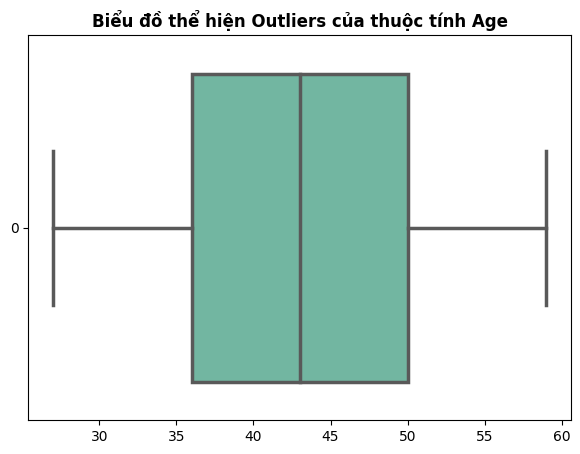

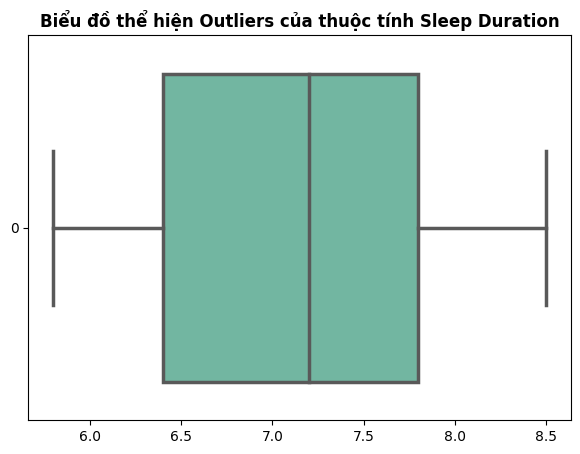

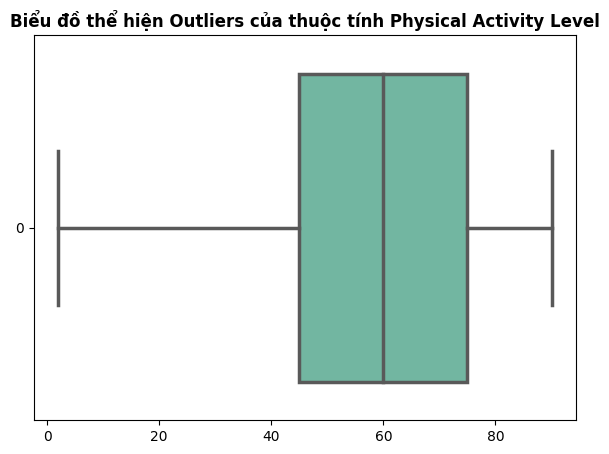

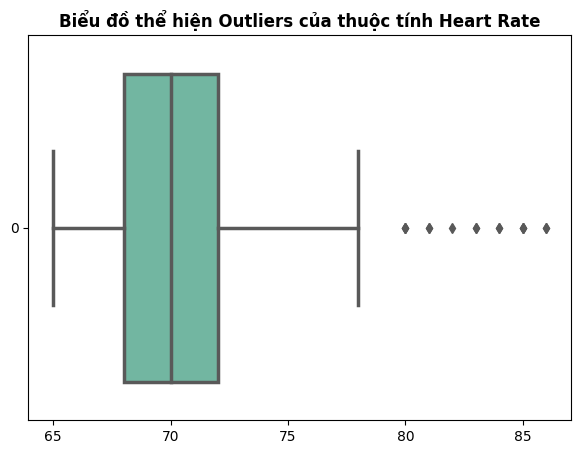

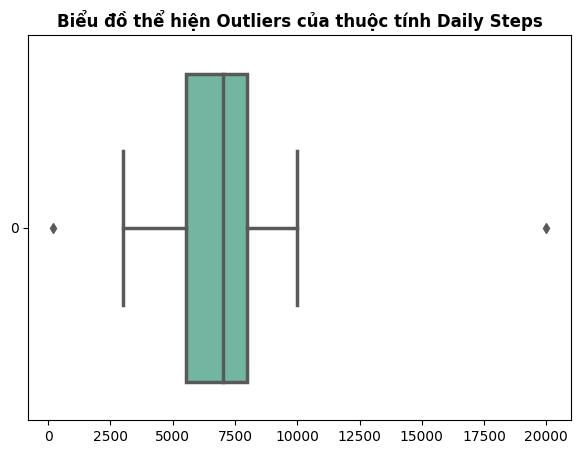

In [ ]:
# Chọn các thuộc tính để phát hiện Outliers
selected_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']

for column in selected_columns:
  # Vẽ biểu đồ boxplot cho các thuộc tính được chọn
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=data[column], orient="h", palette="Set2", linewidth=2.5)
  plt.title(f"Biểu đồ thể hiện Outliers của thuộc tính {column}", fontweight='bold')
  # Hiển thị biểu đồ
  plt.show()

**b. Hiển thị dữ liệu nhiễu**

In [ ]:
# Hàm để in ra các giá trị outliers của một thuộc tính cụ thể
def print_outliers(column_name, data1):
    column = data1[column_name]
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column[(column < lower_bound) | (column > upper_bound)]

    if not outliers.empty:
        print(f"Outliers for '{column_name}':")
        print(outliers)

print_outliers('Heart Rate', data)
print_outliers('Daily Steps', data)

Outliers for 'Heart Rate':
3      85.0
4      85.0
5      85.0
6      82.0
16     80.0
18     80.0
80     81.0
81     81.0
93     84.0
145    84.0
147    80.0
264    83.0
266    83.0
276    86.0
277    86.0
Name: Heart Rate, dtype: float64
Outliers for 'Daily Steps':
10       200.0
265    20000.0
Name: Daily Steps, dtype: float64


**c. Xử lý Outliers**

In [ ]:
# IQR
# Calculate the upper and lower limits
Q1 = data["Daily Steps"].quantile(0.25)
Q3 = data["Daily Steps"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data["Daily Steps"]>=upper)[0]
lower_array = np.where(data["Daily Steps"]<=lower)[0]

data["Daily Steps"][lower_array] = data["Daily Steps"].median()
data["Daily Steps"][upper_array] = data["Daily Steps"].median()

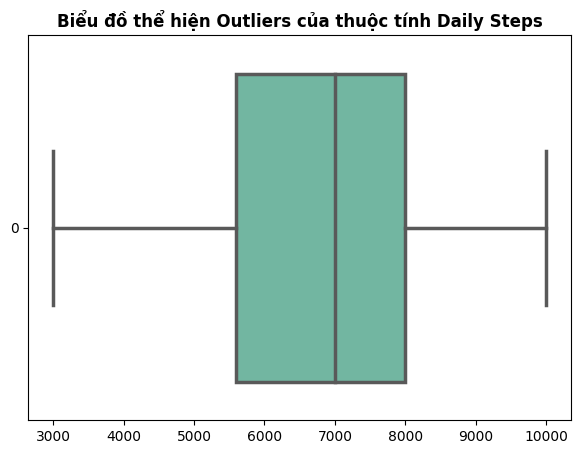

In [ ]:
# Chọn các thuộc tính để phát hiện Outliers
selected_columns = ['Daily Steps']

for column in selected_columns:
  # Vẽ biểu đồ boxplot cho các thuộc tính được chọn
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=data[column], orient="h", palette="Set2", linewidth=2.5)
  plt.title(f"Biểu đồ thể hiện Outliers của thuộc tính {column}", fontweight='bold')
  # Hiển thị biểu đồ
  plt.show()

## **IV. Xử lý chi tiết** (feature, target)

### ***1. Gender***

In [ ]:
data['Gender'].describe()

count      374
unique       2
top       Male
freq       189
Name: Gender, dtype: object

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
gender_count=data['Gender'].value_counts().reset_index()
gender_count

,index,Gender
0,Male,189
1,Female,185


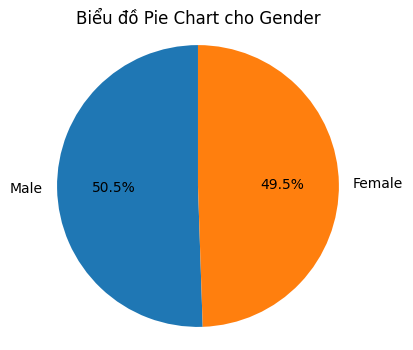

In [ ]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Gender"
gender_counts = data['Gender'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Pie Chart cho Gender')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

### ***2. Age***

In [ ]:
data['Age'].describe()

count    374.000000
mean      42.213904
std        8.657140
min       27.000000
25%       36.000000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

In [ ]:
data['Age'].unique()

array([27., 28., 29., 30., 31., 32., 43., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 44., 45., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59.])

In [ ]:
# Chuyển kiểu dữ liệu của cột "Age" từ float thành int
data['Age'] = data['Age'].astype('int')

In [ ]:
age_count=data['Age'].value_counts().reset_index()
age_count

,index,Age
0,43,35
1,44,30
2,50,20
3,37,20
4,38,20
5,31,18
6,53,17
7,59,16
8,32,16
9,39,15


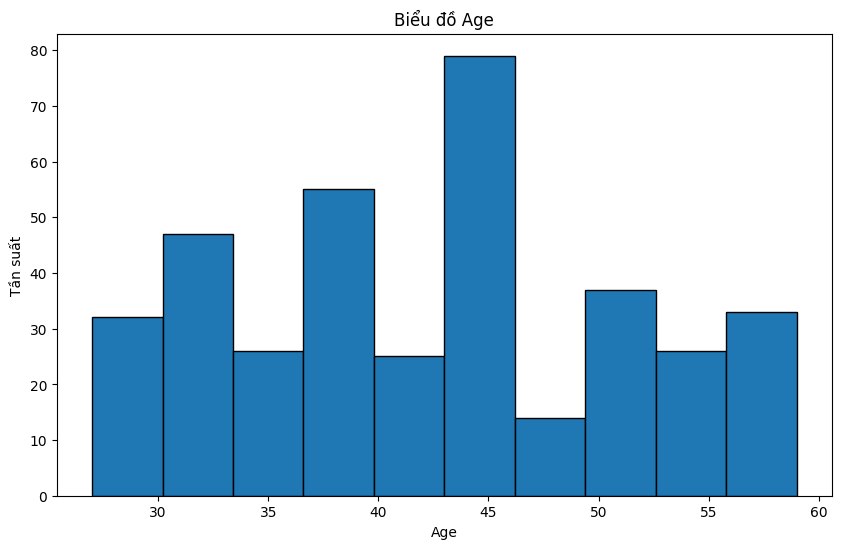

In [ ]:
# Tạo biểu đồ Histogram cho thuộc tính "Age"
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Biểu đồ Age')
plt.xlabel('Age')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Giả sử 'ages' là danh sách hoặc mảng chứa dữ liệu về tuổi
ages = data['Age']

# Xác định các phân vị (percentiles) muốn sử dụng
percentiles = [25, 50, 75]

# Tính toán các phân vị của dữ liệu
age_percentiles = np.percentile(ages, percentiles)

# Hiển thị kết quả
for p, value in zip(percentiles, age_percentiles):
    print(f"{p}th Percentile: {value}")

# 27 - 35 : 8
# 36 - 42 : 6
# 43 - 49 : 6
# 50 - 59 : 9

25th Percentile: 36.0
50th Percentile: 43.0
75th Percentile: 50.0


### ***3. Occupation***

In [ ]:
data['Occupation'].describe()

count       374
unique       11
top       Nurse
freq         74
Name: Occupation, dtype: object

In [ ]:
data['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [ ]:
Occupation_count=data['Occupation'].value_counts().reset_index()
Occupation_count

,index,Occupation
0,Nurse,74
1,Doctor,71
2,Engineer,62
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Software Engineer,4
8,Scientist,4
9,Sales Representative,2


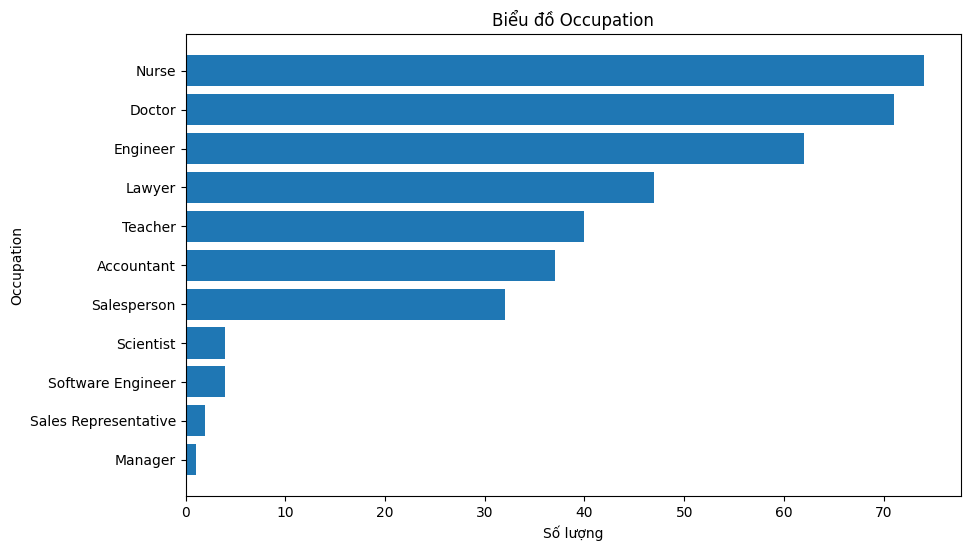

In [ ]:
# Tạo biểu đồ Bar Chart cho thuộc tính "Occupation"
occupation_counts = data['Occupation'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(occupation_counts.index, occupation_counts.values)
plt.xlabel('Số lượng')
plt.ylabel('Occupation')
plt.title('Biểu đồ Occupation')

# Hiển thị biểu đồ
plt.show()

### ***4. Sleep Duration***

In [ ]:
data['Sleep Duration'].describe()

count    374.000000
mean       7.129947
std        0.794796
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [ ]:
data['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.2, 7.5,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [ ]:
Sleep_Duration_count=data['Sleep Duration'].value_counts().reset_index()
Sleep_Duration_count

,index,Sleep Duration
0,7.2,38
1,6.0,31
2,7.8,27
3,6.5,26
4,6.1,25
5,7.7,24
6,6.6,20
7,7.1,19
8,8.1,15
9,7.3,14


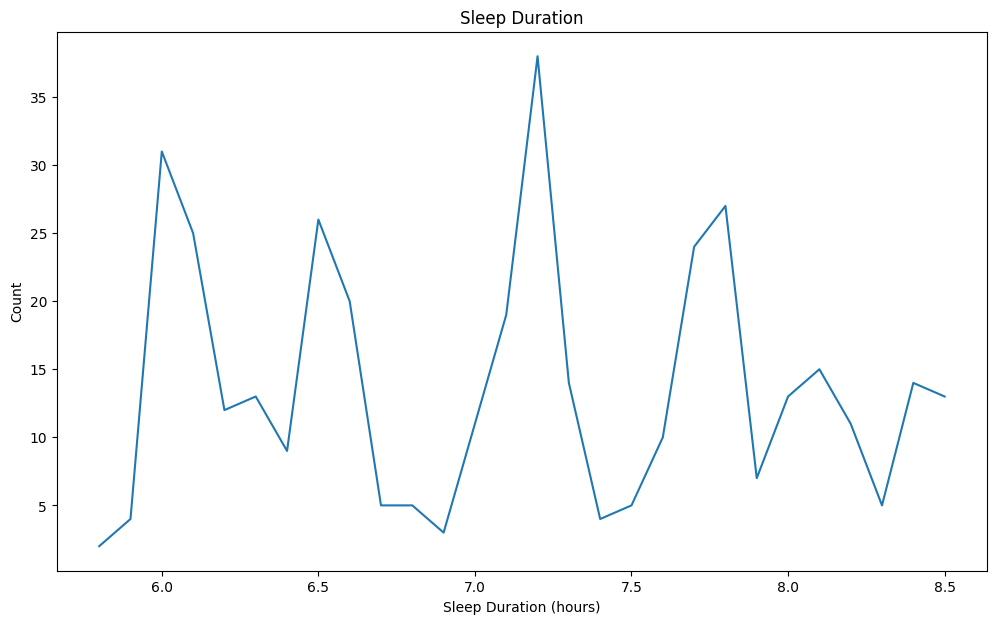

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'index',
             y = 'Sleep Duration',
             data = Sleep_Duration_count)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')
plt.title('Sleep Duration')

plt.show()

### ***5. Quality of Sleep***

In [ ]:
data['Quality of Sleep'].describe()

count    374.000000
mean       7.315508
std        1.195131
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

In [ ]:
data['Quality of Sleep'].unique()

array([6., 4., 7., 5., 8., 9.])

In [ ]:
# Chuyển dạng dữ liệu của 'Quality of Sleep' từ float64 thành object
data['Quality of Sleep'] = data['Quality of Sleep'].astype('object')

In [ ]:
Quality_of_Sleep_count=data['Quality of Sleep'].value_counts().reset_index()
Quality_of_Sleep_count

,index,Quality of Sleep
0,8.0,109
1,6.0,104
2,7.0,78
3,9.0,71
4,5.0,7
5,4.0,5


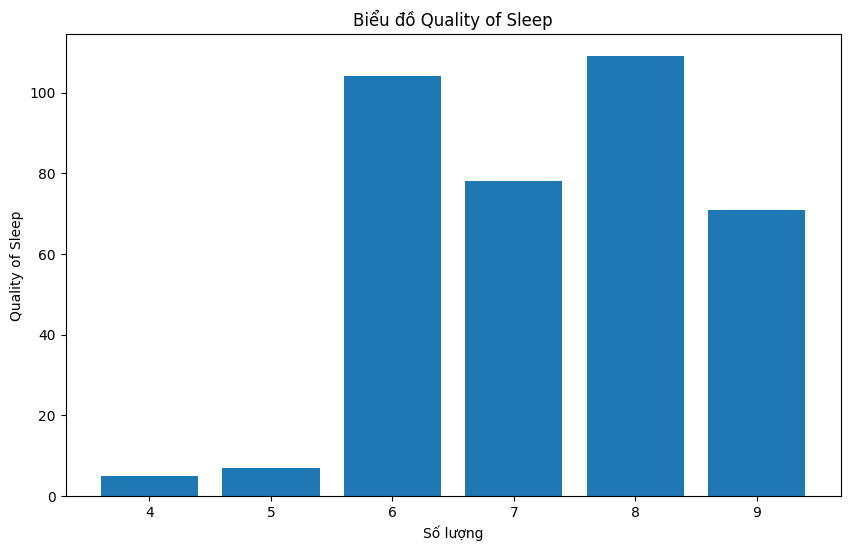

In [ ]:
# Tạo biểu đồ Bar Chart cho thuộc tính "Quality of Sleep"
quality_of_Sleep_counts = data['Quality of Sleep'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(quality_of_Sleep_counts.index, quality_of_Sleep_counts.values)
plt.xlabel('Số lượng')
plt.ylabel('Quality of Sleep')
plt.title('Biểu đồ Quality of Sleep')

# Hiển thị biểu đồ
plt.show()

### ***6. Physical Activity Level***

In [ ]:
data['Physical Activity Level'].describe()

count    374.000000
mean      59.216578
std       20.918549
min        2.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [ ]:
data['Physical Activity Level'].unique()

array([42., 60., 30., 40., 75.,  2., 35., 45., 50., 32., 70., 80., 55.,
       90., 47., 65., 85.])

In [ ]:
Physical_Activity_Level=data['Physical Activity Level'].value_counts().reset_index()
Physical_Activity_Level

,index,Physical Activity Level
0,60.0,72
1,75.0,67
2,45.0,67
3,90.0,67
4,30.0,66
5,55.0,6
6,40.0,6
7,50.0,4
8,35.0,4
9,70.0,3


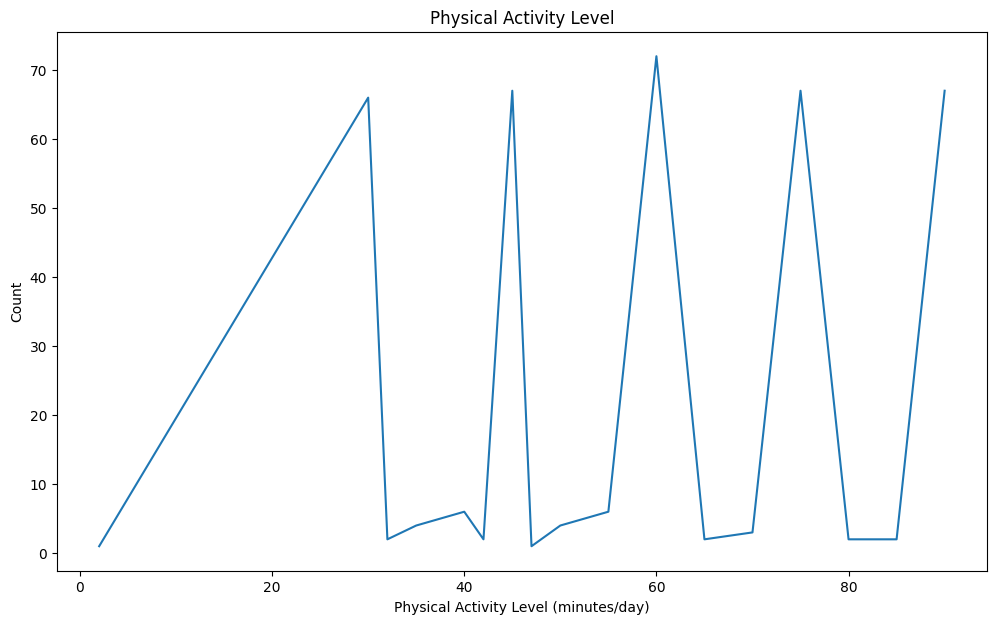

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(x = 'index',
             y = 'Physical Activity Level',
             data = Physical_Activity_Level)
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Count')
plt.title('Physical Activity Level')

plt.show()

### ***7. Stress Level***

In [ ]:
data['Stress Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

In [ ]:
data['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

In [ ]:
# Chuyển dạng dữ liệu của 'Stress Level' từ float64 thành object
data['Stress Level'] = data['Stress Level'].astype('object')

In [ ]:
stress_Level_count=data['Stress Level'].value_counts().reset_index()
stress_Level_count

,index,Stress Level
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


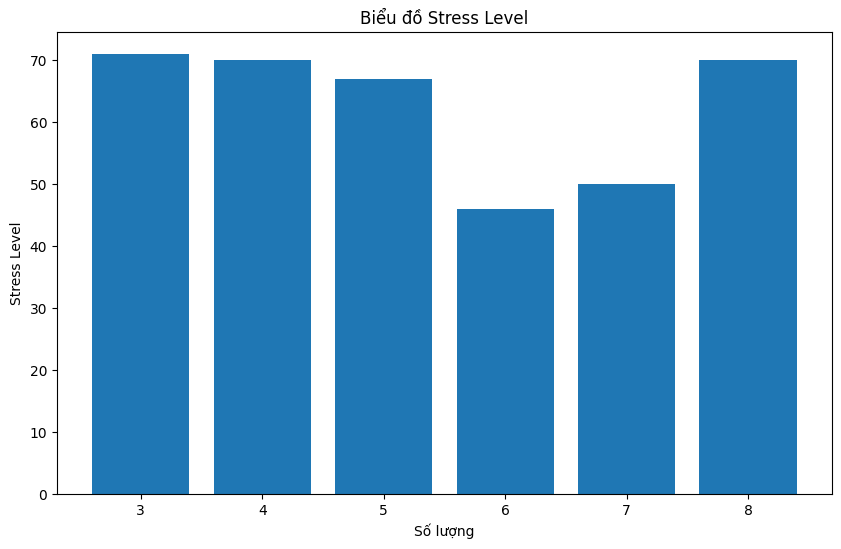

In [ ]:
# Tạo biểu đồ Bar Chart cho thuộc tính "Stress Level"
stress_Level_count = data['Stress Level'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(stress_Level_count.index, stress_Level_count.values)
plt.xlabel('Số lượng')
plt.ylabel('Stress Level')
plt.title('Biểu đồ Stress Level')

# Hiển thị biểu đồ
plt.show()

### ***8. BMI Category***

In [ ]:
data['BMI Category'].describe()

count        374
unique         4
top       Normal
freq         195
Name: BMI Category, dtype: object

In [ ]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
# Thay thế các giá trị Normal thành Normal Weight
data['BMI Category']=data['BMI Category'].replace({'Normal':'Normal Weight'})

In [ ]:
BMI_Category_count=data['BMI Category'].value_counts().reset_index()
BMI_Category_count

,index,BMI Category
0,Normal Weight,216
1,Overweight,148
2,Obese,10


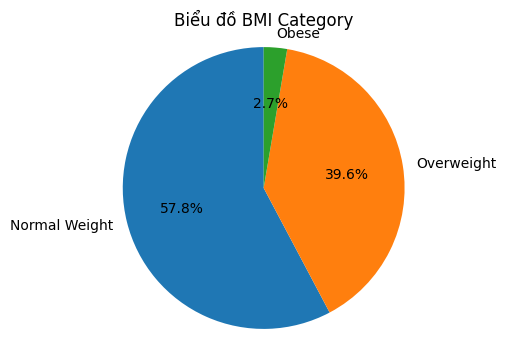

In [ ]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "BMI Category"
BMI_category_counts = data['BMI Category'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(BMI_category_counts, labels=BMI_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ BMI Category')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

### ***9. Blood Pressure***

In [ ]:
data['Blood Pressure'].describe()

count        374
unique        25
top       130/85
freq         100
Name: Blood Pressure, dtype: object

In [ ]:
data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '130/85', '135/88', '129/84', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
# Mã hóa các giá trị của Blood Pressure thành 4 nhóm
data['Blood Pressure'].replace(['120/80','117/76','118/76','115/75','115/78', '119/77', '118/75']
                               , 'HA Bình thường', inplace=True)
data['Blood Pressure'].replace(['125/80','121/79','122/80'], 'HA Cao', inplace=True)
data['Blood Pressure'].replace(['132/87','130/86','126/83','128/85','131/86', '128/84', '130/85',
                                '135/88', '129/84', '125/82'], 'Tăng HA giai đoạn 1', inplace=True)
data['Blood Pressure'].replace(['140/90','135/90','142/92','140/95','139/91'], 'Tăng HA giai đoạn 2', inplace=True)
# 0 = Huyết áp bình thường (<120 và <80)
# 1 = Huyết áp cao (120–129	và <80)
# 2 = Tăng huyết áp giai đoạn 1 (130–139 hoặc 80–89)
# 3 = Tăng huyết áp giai đoạn 2 (>=140 hoặc >=90)

In [ ]:
blood_bressure_counts=data['Blood Pressure'].value_counts().reset_index()
blood_bressure_counts

,index,Blood Pressure
0,Tăng HA giai đoạn 1,122
1,Tăng HA giai đoạn 2,100
2,HA Bình thường,86
3,HA Cao,66


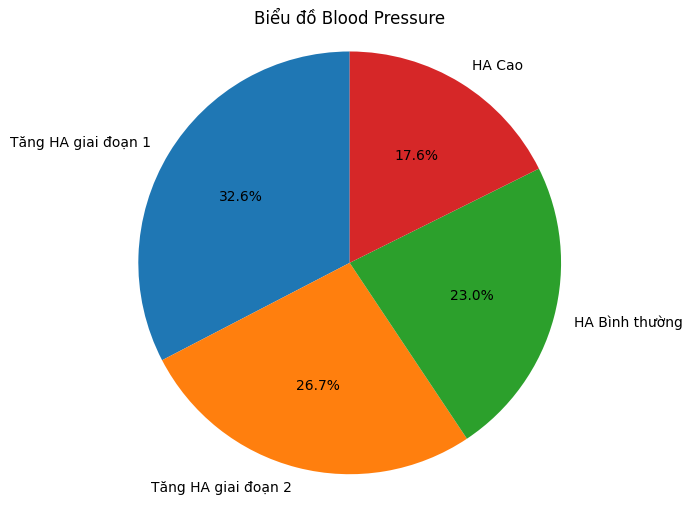

In [ ]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Blood Pressure"
blood_bressure_counts = data['Blood Pressure'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(blood_bressure_counts, labels=blood_bressure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Blood Pressure')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

### ***10. Heart Rate***

In [ ]:
data['Heart Rate'].describe()

count    374.000000
mean      70.179144
std        4.127004
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

In [ ]:
data['Heart Rate'].unique()

array([77., 75., 85., 82., 70., 80., 78., 69., 72., 68., 76., 81., 65.,
       84., 74., 67., 73., 83., 86.])

In [ ]:
# Chuyển kiểu dữ liệu của cột "Heart Rate" từ float thành int
data['Heart Rate'] = data['Heart Rate'].astype('int')

In [ ]:
Heart_Rate_count=data['Heart Rate'].value_counts().reset_index()
Heart_Rate_count

,index,Heart Rate
0,68,94
1,70,77
2,72,69
3,65,66
4,75,36
5,78,5
6,85,3
7,80,3
8,84,2
9,83,2


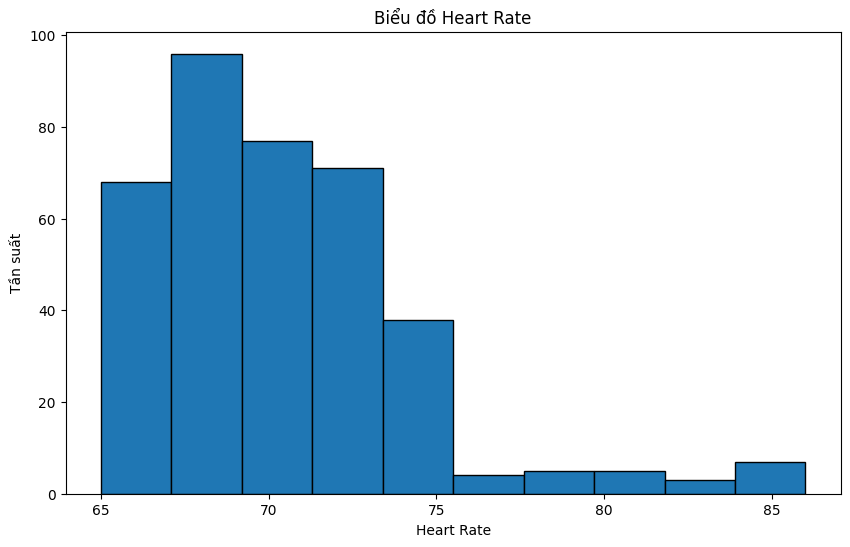

In [ ]:
# Tạo biểu đồ Histogram cho thuộc tính "Heart Rate"
plt.figure(figsize=(10, 6))
plt.hist(data['Heart Rate'], bins=10, edgecolor='black')
plt.title('Biểu đồ Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

### ***11. Daily Steps***

In [ ]:
data['Daily Steps'].describe()

count      374.000000
mean      6803.475936
std       1607.193515
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

In [ ]:
data['Daily Steps'].unique()

array([ 4200., 10000.,  3000.,  3500.,  8000.,  7000.,  4000.,  4100.,
        6800.,  5000.,  5500.,  5200.,  5600.,  3300.,  4800.,  7500.,
        7300.,  6200.,  6000.,  3700.])

In [ ]:
# Chuyển kiểu dữ liệu của cột "Daily Steps" từ float thành int
data['Daily Steps'] = data['Daily Steps'].astype('int')

In [ ]:
Daily_Steps_count=data['Daily Steps'].value_counts().reset_index()
Daily_Steps_count

,index,Daily Steps
0,8000,99
1,7000,69
2,6000,68
3,5000,68
4,10000,35
5,5500,4
6,3000,3
7,3500,3
8,4000,3
9,6800,3


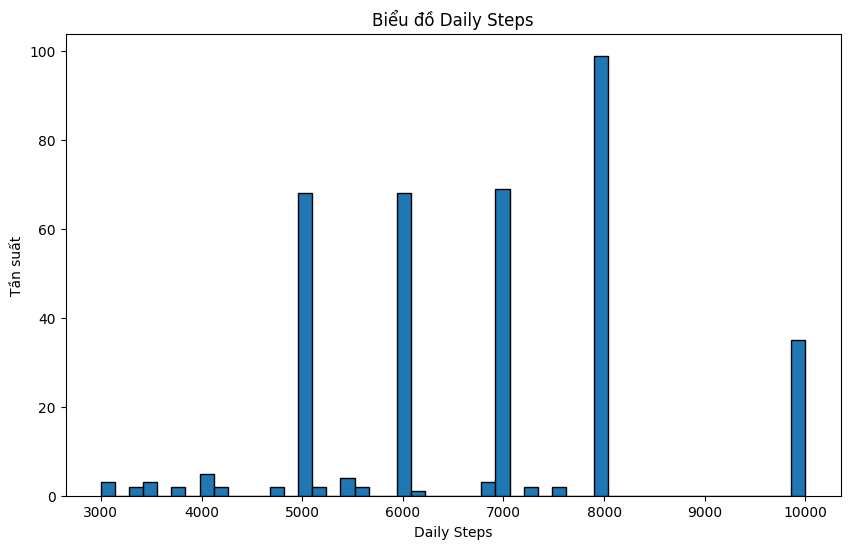

In [ ]:
# Tạo biểu đồ Histogram cho thuộc tính "Daily Steps"
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Steps'], bins=50, edgecolor='black')
plt.title('Biểu đồ Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

### ***12. Sleep Disorder***

In [ ]:
data['Sleep Disorder'].describe()

count      374
unique       3
top       None
freq       220
Name: Sleep Disorder, dtype: object

In [ ]:
data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
Sleep_Disorder_count=data['Sleep Disorder'].value_counts().reset_index()
Sleep_Disorder_count

,index,Sleep Disorder
0,None,220
1,Sleep Apnea,78
2,Insomnia,76


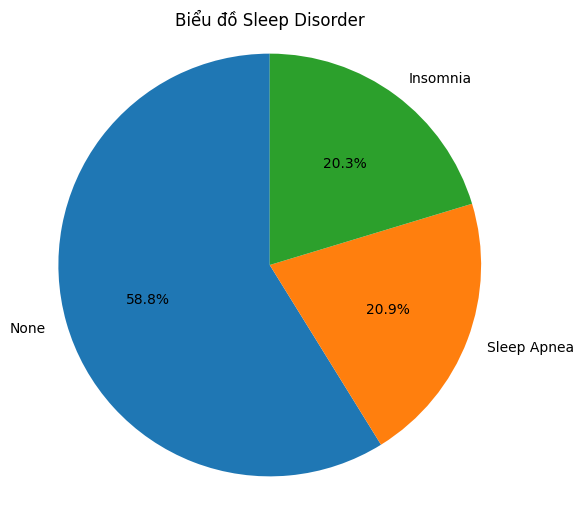

In [ ]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Sleep Disorder"
Sleep_Disorder_counts = data['Sleep Disorder'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(Sleep_Disorder_counts, labels=Sleep_Disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Sleep Disorder')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

In [ ]:
data['Sleep Disorder'].replace(['Insomnia','Sleep Apnea'], 'Yes', inplace=True)
data['Sleep Disorder'].replace(['None'], 'No', inplace=True)

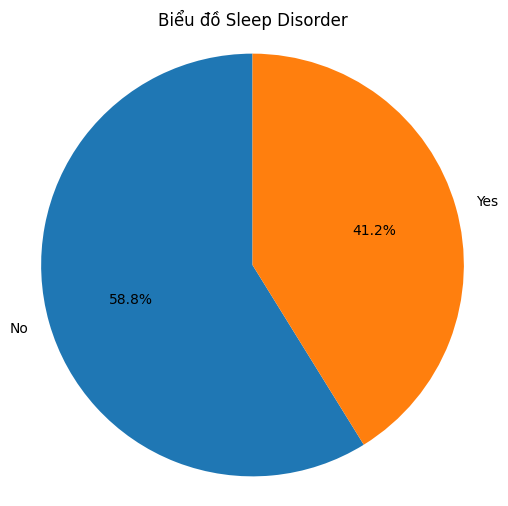

In [ ]:
# Tính toán số lượng mẫu cho từng giá trị của thuộc tính "Sleep Disorder"
Sleep_Disorder_counts = data['Sleep Disorder'].value_counts()

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(Sleep_Disorder_counts, labels=Sleep_Disorder_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Sleep Disorder')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

## **V. Phân phối dữ liệu**

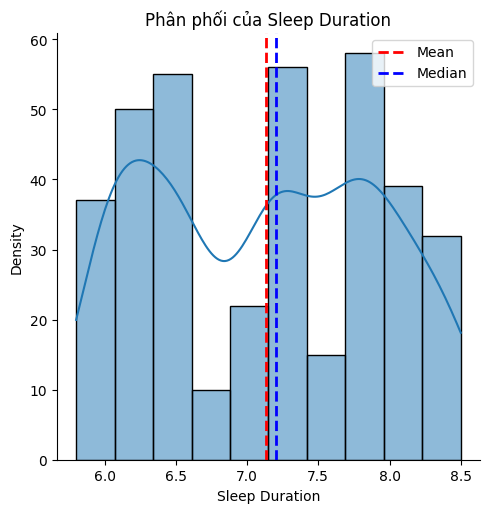

statistic =  0.9362137913703918
pvalue =  1.4187778556162822e-11
Dữ liệu biến Sleep Duration không tuân theo phân phối chuẩn.



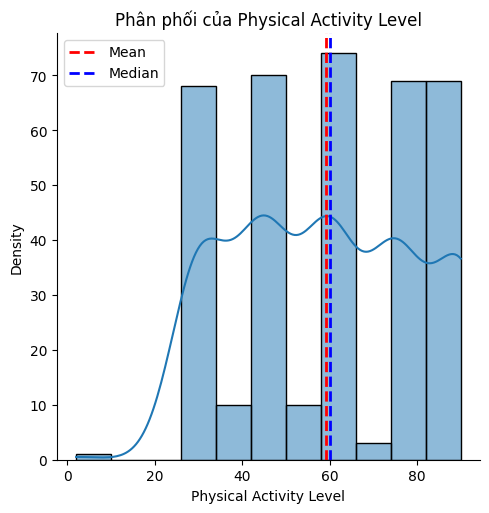

statistic =  0.9086865782737732
pvalue =  3.0538234701421585e-14
Dữ liệu biến Physical Activity Level không tuân theo phân phối chuẩn.



In [ ]:
numercial_columns = ['Sleep Duration', 'Physical Activity Level']
for column in numercial_columns:
  sns.displot(data[column], kde=True)

  # Tính giá trị trung bình của dữ liệu
  mean_value = np.mean(data[column])
  median_value = np.median(data[column])

  # Vẽ đường thể hiện giá trị trung bình
  plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(median_value, color='b', linestyle='dashed', linewidth=2, label='Median')

  plt.title(f"Phân phối của {column}")
  plt.xlabel(column)
  plt.ylabel("Density")
  plt.legend()
  plt.show()

    # Kiểm định Shapiro-Wilk
  stat, p = stats.shapiro(data[column])
  print("statistic = ", stat)
  print("pvalue = ", p)
  if p > 0.05:
      print(f"Dữ liệu biến {column} có thể tuân theo phân phối chuẩn.", end="\n\n")
  else:
      print(f"Dữ liệu biến {column} không tuân theo phân phối chuẩn.", end="\n\n")

## **VI. Phân tích tính ảnh hưởng giữa các biến**

In [ ]:
data.drop('Person ID', axis=1, inplace=True)

### **1. Sử dụng heatmap và Spearman để quan sát sự tương quan giữa các biến số**

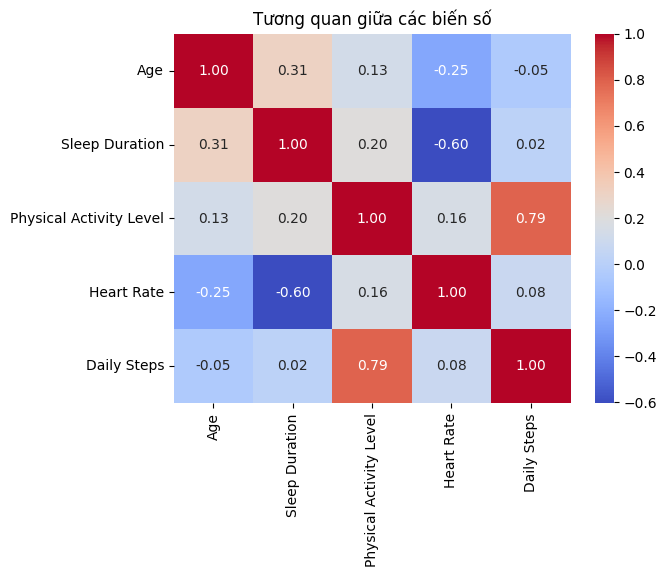

In [ ]:
# Tính ma trận tương quan sử dụng Spearman
correlation_matrix_spearman = data.corr(method="spearman")

# Vẽ biểu đồ Heatmap
sns.heatmap(correlation_matrix_spearman, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Tương quan giữa các biến số')

# Hiển thị biểu đồ
plt.show()

### **2. Sử dụng heatmap và Chi-Quare để quan sát sự ảnh hưởng giữa các biến phân loại**

In [ ]:
# Tạo heatmap cho từng cặp biến
variables = ['Gender','Occupation','Quality of Sleep','Stress Level','BMI Category','Blood Pressure','Sleep Disorder']
# Tạo ma trận chứa giá trị kiểm định
significant_pairs = {}

plt.figure(figsize=(12, 8))

alpha = 0.05
for i in range(len(variables)):
    x = variables[i]
    significant_pairs[x] = []
    for j in range(len(variables)):
        if i == j:
            significant_pairs[x].append(0)
            continue

        var1 = variables[i]
        var2 = variables[j]

        # Tạo bảng tần số (contingency table)
        contingency_table = pd.crosstab(data[var1], data[var2])

        # Kiểm định chi-square
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        if p_value < alpha:
            significant_pairs[x].append(chi2)
        else:
            significant_pairs[x].append(0)
print(significant_pairs)

{'Gender': [0, 271.2807061809947, 84.95375350079121, 184.36771549390292, 50.705361629325594, 123.46956967373485, 30.6003299217585], 'Occupation': [271.2807061809947, 0, 719.8054128407049, 853.5363307882114, 361.98402710239117, 616.8966311259728, 200.74295829091213], 'Quality of Sleep': [84.95375350079121, 719.8054128407049, 0, 844.3664397610105, 180.7879732185875, 208.1603409855279, 87.48319610085828], 'Stress Level': [184.36771549390292, 853.5363307882116, 844.3664397610103, 0, 102.57453826706949, 460.6283372400577, 99.51122393319777], 'BMI Category': [50.7053616293256, 361.9840271023911, 180.78797321858752, 102.57453826706947, 0, 247.4575750723401, 241.4228514228514], 'Blood Pressure': [123.46956967373485, 616.8966311259728, 208.1603409855279, 460.6283372400577, 247.4575750723401, 0, 198.66673259857436], 'Sleep Disorder': [30.6003299217585, 200.7429582909121, 87.48319610085828, 99.51122393319777, 241.4228514228514, 198.66673259857436, 0]}


<Figure size 1200x800 with 0 Axes>

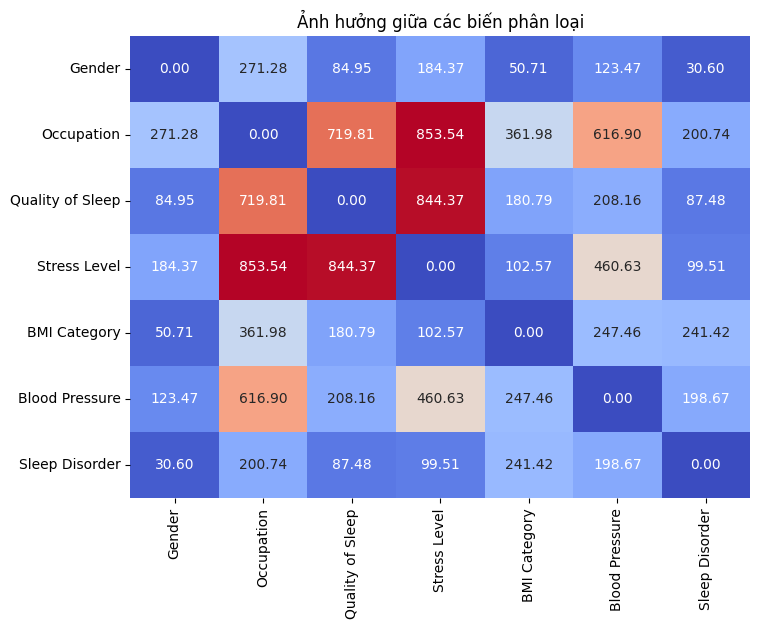

In [ ]:
# Chuyển ma trận thành DataFrame
df = pd.DataFrame(significant_pairs)

# Nhãn của trục y
y_labels = list(df.keys())

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", cbar=False, yticklabels=y_labels)
plt.title('Ảnh hưởng giữa các biến phân loại')

# Hiển thị biểu đồ
plt.show()

### **3. Sử dụng heatmap và Kruskal-Wallis để quan sát sự ảnh hưởng giữa các biến phân loại và biến số**

In [ ]:
# Tạo heatmap cho từng cặp biến
numericals = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']
categoricals = ['Gender','Occupation','Quality of Sleep','Stress Level','BMI Category','Blood Pressure','Sleep Disorder']
# Tạo ma trận chứa giá trị kiểm định
significant_pairs = {}

plt.figure(figsize=(12, 8))

alpha = 0.05
for i in range(len(numericals)):
    x = numericals[i]
    significant_pairs[x] = []
    for j in range(len(categoricals)):
        gb = data.groupby(categoricals[j])[x]
        datagb = [group for name, group in gb]

        stat, p_value = stats.kruskal(*datagb)

        if p_value < alpha:
            significant_pairs[x].append(stat)
        else:
            significant_pairs[x].append(0)
print(significant_pairs)

{'Age': [127.56785858990443, 209.58112196616122, 177.31867408950316, 181.81789016344797, 115.95965520336195, 165.3936873214141, 75.3543820333936], 'Sleep Duration': [6.101967346717687, 128.3518650355433, 313.8778873545862, 321.9171400249063, 42.99529653419463, 16.455191294776906, 33.64269391389416], 'Physical Activity Level': [0, 125.60583331169035, 50.04641731461529, 72.64042407261759, 0, 124.52297143891532, 0], 'Heart Rate': [34.02333777723863, 153.6180903971545, 217.17296281989562, 264.0382300577569, 53.146768685729135, 37.88040230566648, 27.454464499333113], 'Daily Steps': [0, 103.82592365582097, 80.3086689927293, 100.49463318644904, 31.54445364432363, 120.23283491469282, 0]}


<Figure size 1200x800 with 0 Axes>

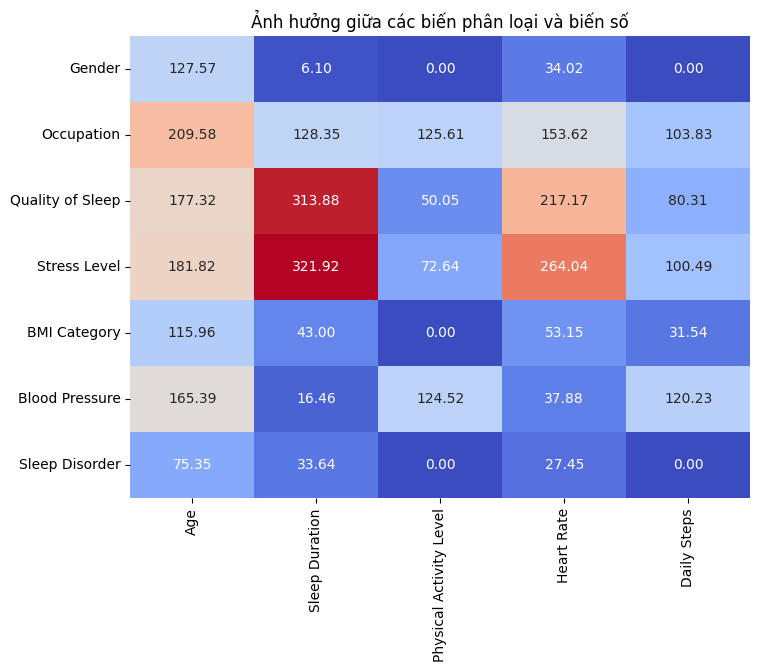

In [ ]:
# Chuyển ma trận thành DataFrame
df = pd.DataFrame(significant_pairs)

# Nhãn của trục y
y_labels = categoricals

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", cbar=False, yticklabels=y_labels)
plt.title('Ảnh hưởng giữa các biến phân loại và biến số')

# Hiển thị biểu đồ
plt.show()

## **VII. Tổng quan dữ liệu sau xử lý**

In [ ]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6.0,42.0,6,Overweight,Tăng HA giai đoạn 1,77,4200,No
1,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,No
2,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,No
3,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Yes
4,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes
370,Female,59,Nurse,8.0,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes
371,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes
372,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes


In [ ]:
## Thông tin chi tiết bộ dữ liệu sau xử lý
print('=== THÔNG TIN BỘ DỮ LIỆU SAU XỬ LÝ===')
print('\n>> Số lượng phần tử trong bộ dữ liệu:', data.size)
print('>> Kích thước bộ dữ liệu (số dòng, số cột):', data.shape)
data.info()

=== THÔNG TIN BỘ DỮ LIỆU SAU XỬ LÝ===

>> Số lượng phần tử trong bộ dữ liệu: 4488
>> Kích thước bộ dữ liệu (số dòng, số cột): (374, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    object 
 5   Physical Activity Level  374 non-null    float64
 6   Stress Level             374 non-null    object 
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dty

# **Chương 3: Phân tích và khai thác dữ liệu**

## **I. Phân cụm**

### **1. Tiền xử lý trước phân cụm**

In [ ]:
# Copy bộ dữ liệu hiện tại để dùng cho việc phân cụm
data_cluster = data.copy()

In [ ]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    object 
 5   Physical Activity Level  374 non-null    float64
 6   Stress Level             374 non-null    object 
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 35.2+ KB


**a. Mã hóa**

In [ ]:
data_cluster

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6.0,42.0,6,Overweight,Tăng HA giai đoạn 1,77,4200,No
1,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,No
2,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,No
3,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Yes
4,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes
370,Female,59,Nurse,8.0,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes
371,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes
372,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes


In [ ]:
# Quality of Sleep
data_cluster['Quality of Sleep'] = data_cluster['Quality of Sleep'].astype('int64')
# Stress Level
data_cluster['Stress Level'] = data_cluster['Stress Level'].astype('int64')
# BMI Category
data_cluster['BMI Category']=data_cluster['BMI Category'].replace({'Normal Weight': 0})
data_cluster['BMI Category']=data_cluster['BMI Category'].replace({'Overweight': 1})
data_cluster['BMI Category']=data_cluster['BMI Category'].replace({'Obese': 2})
# Blood Pressure
data_cluster['Blood Pressure']=data_cluster['Blood Pressure'].replace({'HA Bình thường': 0})
data_cluster['Blood Pressure']=data_cluster['Blood Pressure'].replace({'HA Cao': 1})
data_cluster['Blood Pressure']=data_cluster['Blood Pressure'].replace({'Tăng HA giai đoạn 1': 2})
data_cluster['Blood Pressure']=data_cluster['Blood Pressure'].replace({'Tăng HA giai đoạn 2': 3})
# Gender
# Occupation
# Sleep Disorder
df_encoded = pd.get_dummies(data_cluster, columns=['Gender', 'Occupation', 'Sleep Disorder'], prefix=['Gender', 'Occupation', 'Sleep Disorder'], drop_first= True)
data_cluster = pd.concat([data_cluster, df_encoded], axis=1)

# Xóa các cột ban đầu và bỏ bớt các cột nhị phân
selected_columns = ['Gender', 'Occupation', 'Sleep Disorder']
data_cluster.drop(selected_columns, axis=1, inplace=True)
# Xóa các cột trùng nhau
data_cluster = data_cluster.T.drop_duplicates().T

In [ ]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    float64
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    float64
 3   Physical Activity Level          374 non-null    float64
 4   Stress Level                     374 non-null    float64
 5   BMI Category                     374 non-null    float64
 6   Blood Pressure                   374 non-null    float64
 7   Heart Rate                       374 non-null    float64
 8   Daily Steps                      374 non-null    float64
 9   Gender_Male                      374 non-null    float64
 10  Occupation_Doctor                374 non-null    float64
 11  Occupation_Engineer              374 non-null    float64
 12  Occupation_Lawyer     

**b. Chuẩn hóa**

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cluster)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
data_cluster = pd.DataFrame(scaled_data, columns=data_cluster.columns)

In [ ]:
data_cluster

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Gender_Male,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Yes
0,0.00000,0.111111,0.4,0.454545,0.6,0.5,0.666667,0.571429,0.171429,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.03125,0.148148,0.4,0.659091,1.0,0.0,0.333333,0.476190,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03125,0.148148,0.4,0.659091,1.0,0.0,0.333333,0.476190,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03125,0.037037,0.0,0.318182,1.0,1.0,1.000000,0.952381,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.03125,0.037037,0.0,0.318182,1.0,1.0,1.000000,0.952381,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.00000,0.851852,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
370,1.00000,0.814815,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
371,1.00000,0.851852,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
372,1.00000,0.851852,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**c. Elbow phương sai**

In [ ]:
## Áp dụng PCA (chưa xác định k --> giữ nguyên số chiều)
pca = PCA().fit(data_cluster)

* Số lượng features = 20
  Các features: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Gender_Male, Occupation_Doctor, Occupation_Engineer, Occupation_Lawyer, Occupation_Manager, Occupation_Nurse, Occupation_Sales Representative, Occupation_Salesperson, Occupation_Scientist, Occupation_Software Engineer, Occupation_Teacher


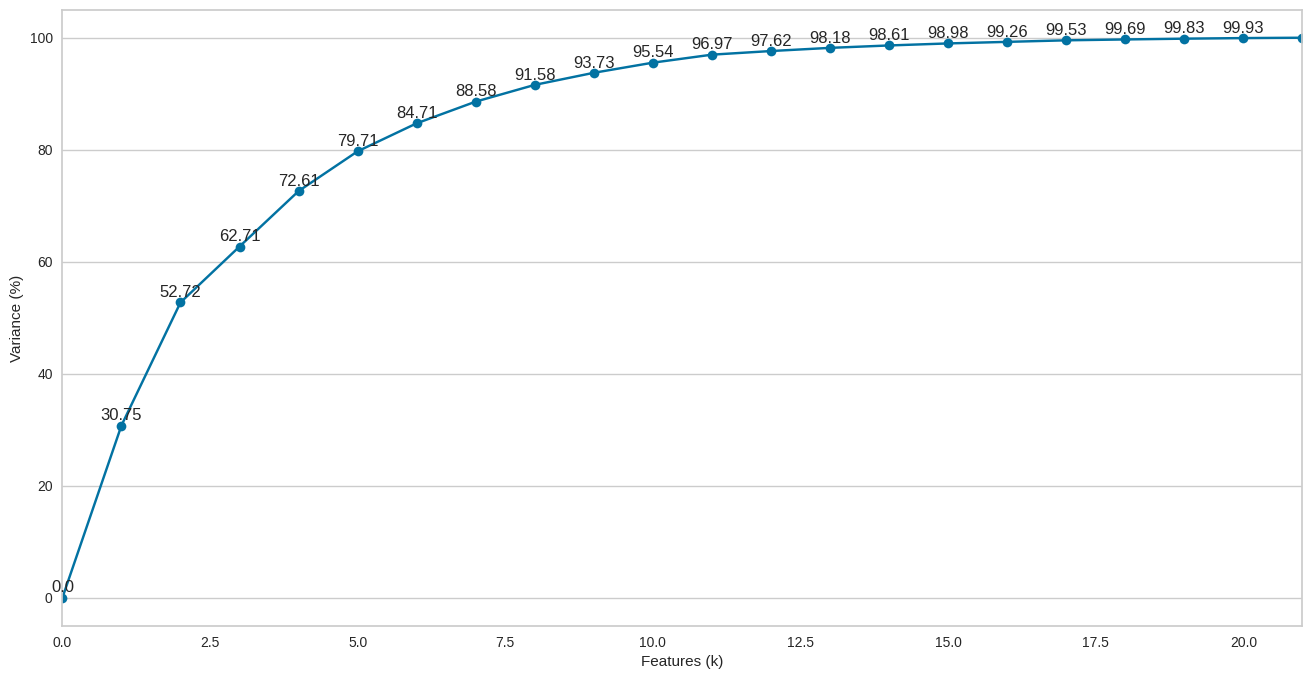

In [ ]:
## Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features --> chọn k theo điểm "gẫy"
nb_features = data_cluster.shape[1] - 1
features    = data_cluster.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features))

points = np.cumsum(pca.explained_variance_ratio_) * 100 # Các điểm dữ liệu
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points[-22:])//0.01/100

plt.figure(figsize = (16, 8))
plt.plot(points, marker = 'o')
plt.xlabel('Features (k)')
plt.ylabel('Variance (%)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, y_i[i], ha = 'center', va = 'baseline') # tung độ của text cao hơn point 1 đơn vị

plt.show()

In [ ]:
## Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(data_cluster)

    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, ': phương sai tích lũy ~ %.2f%%' %newVar,
          '--> tăng ~ %.2f%%' %(newVar - var))
    var = newVar

   * k =  1 : phương sai tích lũy ~ 30.75% --> tăng ~ 30.75%
   * k =  2 : phương sai tích lũy ~ 52.73% --> tăng ~ 21.98%
   * k =  3 : phương sai tích lũy ~ 62.72% --> tăng ~ 9.99%
   * k =  4 : phương sai tích lũy ~ 72.62% --> tăng ~ 9.90%
   * k =  5 : phương sai tích lũy ~ 79.72% --> tăng ~ 7.10%
   * k =  6 : phương sai tích lũy ~ 84.72% --> tăng ~ 5.00%
   * k =  7 : phương sai tích lũy ~ 88.59% --> tăng ~ 3.87%
   * k =  8 : phương sai tích lũy ~ 91.58% --> tăng ~ 2.99%
   * k =  9 : phương sai tích lũy ~ 93.74% --> tăng ~ 2.16%
   * k = 10 : phương sai tích lũy ~ 95.55% --> tăng ~ 1.81%
   * k = 11 : phương sai tích lũy ~ 96.97% --> tăng ~ 1.43%
   * k = 12 : phương sai tích lũy ~ 97.62% --> tăng ~ 0.65%
   * k = 13 : phương sai tích lũy ~ 98.19% --> tăng ~ 0.57%
   * k = 14 : phương sai tích lũy ~ 98.62% --> tăng ~ 0.43%
   * k = 15 : phương sai tích lũy ~ 98.98% --> tăng ~ 0.36%
   * k = 16 : phương sai tích lũy ~ 99.26% --> tăng ~ 0.28%
   * k = 17 : phương sai tích lũy ~ 99

Dựa trên đồ thị thì có thể chọn k trong khoảng [10 , 12.5] =>  Chọn k bằng 11

**d. PCA**

In [ ]:
data_cluster

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Gender_Male,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Yes
0,0.00000,0.111111,0.4,0.454545,0.6,0.5,0.666667,0.571429,0.171429,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.03125,0.148148,0.4,0.659091,1.0,0.0,0.333333,0.476190,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03125,0.148148,0.4,0.659091,1.0,0.0,0.333333,0.476190,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03125,0.037037,0.0,0.318182,1.0,1.0,1.000000,0.952381,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.03125,0.037037,0.0,0.318182,1.0,1.0,1.000000,0.952381,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.00000,0.851852,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
370,1.00000,0.814815,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
371,1.00000,0.851852,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
372,1.00000,0.851852,1.0,0.829545,0.0,0.5,1.000000,0.142857,0.571429,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = data_cluster.copy()
## Thực hiện PCA với k = 11
k   = 11
pca = PCA(k)
pca.fit(X)

PCA(n_components=11)

In [ ]:
## Chiếu dữ liệu vào không gian mới (Transform data)
PC_name = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11']
P           = pca.transform(X)
data_cluster_pca = pd.DataFrame(data = P, columns = PC_name)

In [ ]:
data_cluster_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11
0,-0.422211,0.573815,0.215426,0.193616,0.075993,-0.355139,0.181793,0.371527,-0.177672,0.799084,0.141124
1,-0.947152,0.845036,-0.200390,-0.552328,-0.005800,-0.011789,0.228975,-0.203221,-0.060624,-0.116887,-0.163672
2,-0.947152,0.845036,-0.200390,-0.552328,-0.005800,-0.011789,0.228975,-0.203221,-0.060624,-0.116887,-0.163672
3,0.379916,1.387983,0.507518,0.417890,-0.175932,-0.214634,0.416574,0.593048,0.333668,0.716902,-0.044609
4,0.379916,1.387983,0.507518,0.417890,-0.175932,-0.214634,0.416574,0.593048,0.333668,0.716902,-0.044609
...,...,...,...,...,...,...,...,...,...,...,...
369,1.264271,-0.534413,-0.427407,-0.078800,-0.177268,0.488772,-0.134592,0.148723,-0.083808,0.016248,0.132989
370,1.266631,-0.521055,-0.422370,-0.082332,-0.172421,0.474868,-0.130973,0.147390,-0.087756,0.011790,0.134421
371,1.264271,-0.534413,-0.427407,-0.078800,-0.177268,0.488772,-0.134592,0.148723,-0.083808,0.016248,0.132989
372,1.264271,-0.534413,-0.427407,-0.078800,-0.177268,0.488772,-0.134592,0.148723,-0.083808,0.016248,0.132989


### **2. Thực hiện phân cụm K-means**

In [ ]:
# Copy bộ dữ liệu hiện tại để dùng cho việc phân cụm
data_cluster_kmeans = data_cluster_pca.copy()

**a. Chọn k để gom cụm**

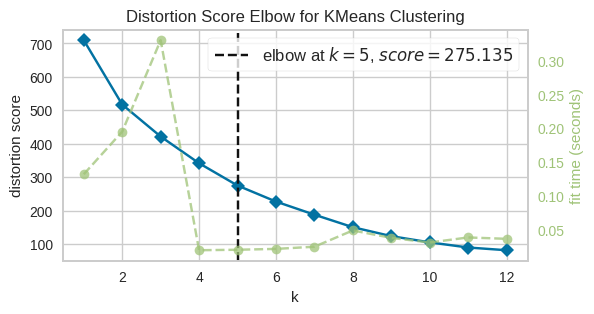

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
plt.figure(figsize = (6, 3))
Elbow_M = KElbowVisualizer(KMeans(), k=(1,13))
Elbow_M.fit(data_cluster_kmeans)
Elbow_M.show()

**Chọn k bằng 5**

**b. Thực hiện phân cụm**

In [ ]:
## Thực hiện clustering bằng phương pháp KMeans
k     = 5
model_kmeans = KMeans(n_clusters = k)
model_kmeans.fit_predict(data_cluster_kmeans)

array([4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 0, 3, 3, 3,
       3, 3, 3, 3, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 1, 3, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 4, 0, 4, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,

In [ ]:
## Các trọng tâm
print(f'*** {k} trọng tâm:')
print(model_kmeans.cluster_centers_)

*** 5 trọng tâm:
[[-4.97029427e-01 -1.30949737e-01 -5.06121531e-01  5.72741813e-01
   1.94090131e-01 -8.39998752e-02  1.17283714e-01 -4.73042463e-02
   4.12169109e-02 -2.62677246e-02  2.46403118e-03  1.00000000e+00]
 [ 1.16412584e+00  4.81435786e-03 -4.48193153e-01 -2.89309006e-01
  -1.45173540e-01 -1.92669498e-03  3.53999317e-02  2.45480302e-02
  -4.80006604e-02  4.03009048e-03  6.19387535e-02  3.00000000e+00]
 [-1.00037291e+00  5.47185053e-01 -4.18180908e-03 -4.75223926e-01
  -5.76967093e-02  2.25444095e-01  6.42120868e-02  2.76998583e-02
  -2.05038832e-02 -7.56442625e-02  2.36498325e-02  4.00000000e+00]
 [-2.99930941e-01 -8.49054714e-01  2.46559882e-01 -1.42036339e-01
  -6.75092968e-02 -1.68742866e-01 -1.15225600e-01 -5.82275686e-03
   5.15436876e-02  2.72260956e-02 -6.36118002e-03  2.00000000e+00]
 [ 4.53660223e-01  4.85902767e-01  4.91892821e-01  3.05407808e-01
   8.27451315e-02  5.40210990e-02 -5.14449459e-02 -6.12555629e-04
  -2.47893132e-02  4.60733398e-02 -6.27179699e-02  1.11

In [ ]:
## Kết quả gom cụm
data_cluster_kmeans['cluster'] = model_kmeans.labels_

print('Số phần tử của mỗi cluster:')
print(data_cluster_kmeans['cluster'].value_counts())

Số phần tử của mỗi cluster:
4    89
3    84
1    71
2    66
0    64
Name: cluster, dtype: int64


In [ ]:
# Tính toán Silhoutte Score để đánh giá hiệu năng của việc phân cụm
score1 = silhouette_score(data_cluster_kmeans, model_kmeans.labels_, metric='euclidean')
# Silhouette score nằm gần 1 nghĩa là ví dụ đang được phân cụm chính xác, xa các cụm khác
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.558


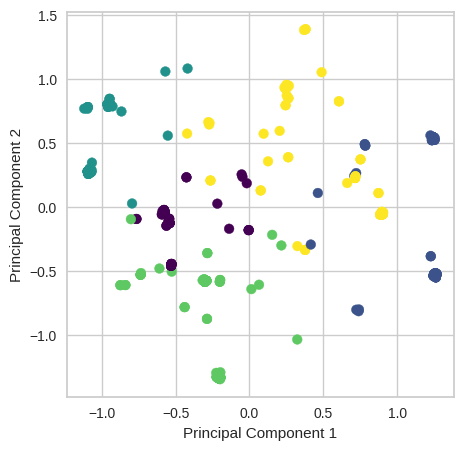

In [ ]:
# Giảm chiều dữ liệu về 2 chiều bằng PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_cluster_pca)
# Tạo DataFrame mới sau khi giảm chiều
df_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])

# Thêm cột cụm vào DataFrame
df_2d['cluster'] = data_cluster_kmeans['cluster']  # labels là kết quả của quá trình phân cụm

# Biểu đồ Scatter Plot
plt.figure(figsize = (5, 5))
plt.scatter(df_2d['PC1'], df_2d['PC2'], c=df_2d['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **3. Thực hiện phân cụm HAC**

In [ ]:
# Copy bộ dữ liệu hiện tại để dùng cho việc phân cụm
data_cluster_hac_ward = data_cluster_pca.copy()
data_cluster_hac_comp = data_cluster_pca.copy()

**a. HAC với ward**

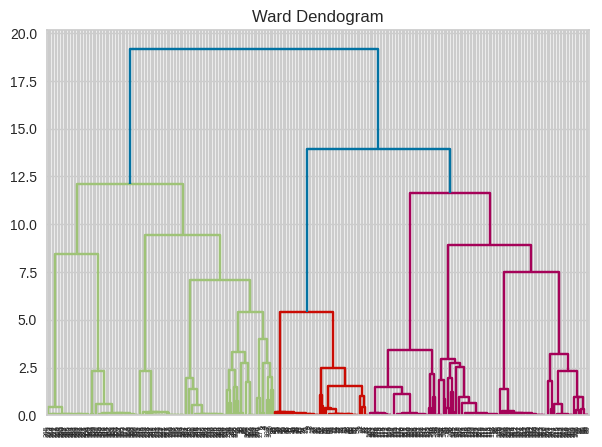

In [ ]:
## Xây dựng Dendrogram
plt.figure(figsize = (7, 5))
plt.title("Ward Dendogram")
dg = hierarchy.dendrogram(hierarchy.linkage(data_cluster_hac_ward, method = 'ward'))

plt.axhline(y = 200, color = 'r', linestyle = '--')
plt.show()

In [ ]:
## Xây dựng mô hình HAC
k     = 3
model_hac_ward = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
model_hac_ward.fit_predict(data_cluster_hac_ward)

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
## Kết quả gom cụm khách hàng
data_cluster_hac_ward['cluster'] = model_hac_ward.labels_

print('Số phần tử của mỗi cluster:')
print(data_cluster_hac_ward['cluster'].value_counts())

Số phần tử của mỗi cluster:
0    157
1    152
2     65
Name: cluster, dtype: int64


In [ ]:
# Tính toán Silhoutte Score để đánh giá hiệu năng của việc phân cụm
score1 = silhouette_score(data_cluster_hac_ward, model_hac_ward.labels_, metric='euclidean')
# Silhouette score nằm gần 1 nghĩa là ví dụ đang được phân cụm chính xác, xa các cụm khác
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.396


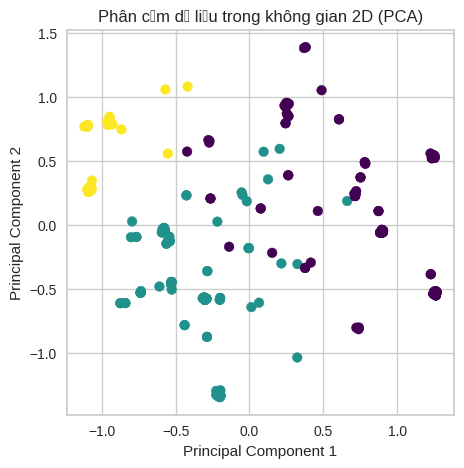

In [ ]:
# Giảm chiều dữ liệu về 2 chiều bằng PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_cluster_pca)
# Tạo DataFrame mới sau khi giảm chiều
df_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])

# Thêm cột cụm vào DataFrame
df_2d['cluster'] = data_cluster_hac_ward['cluster']  # labels là kết quả của quá trình phân cụm

# Biểu đồ Scatter Plot
plt.figure(figsize = (5, 5))
plt.scatter(df_2d['PC1'], df_2d['PC2'], c=df_2d['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**b. HAC với complete**

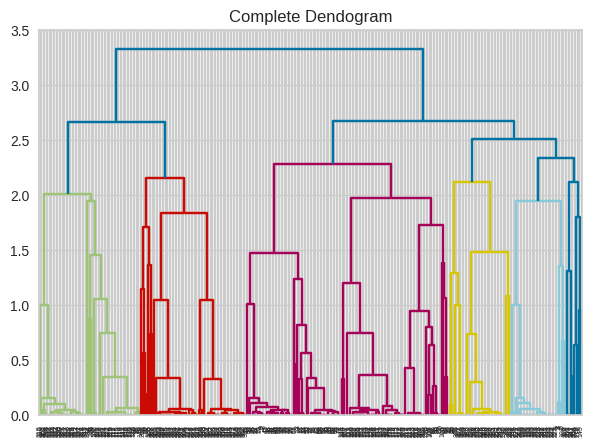

In [ ]:
## Xây dựng Dendrogram
plt.figure(figsize = (7, 5))
plt.title("Complete Dendogram")
dg = hierarchy.dendrogram(hierarchy.linkage(data_cluster_hac_comp, method = 'complete'))

plt.axhline(y = 200, color = 'r', linestyle = '--')
plt.show()

In [ ]:
## Xây dựng mô hình HAC
k     = 6
model_hac_comp = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'complete')
model_hac_comp.fit_predict(data_cluster_hac_comp)

array([0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 1, 0, 0, 0,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 2, 0, 2, 1, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5,
       4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 5, 4, 5,
       5, 4, 5, 4, 5, 2, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,

In [ ]:
## Kết quả gom cụm khách hàng
data_cluster_hac_comp['cluster'] = model_hac_comp.labels_

print('Số phần tử của mỗi cluster:')
print(data_cluster_hac_comp['cluster'].value_counts())

Số phần tử của mỗi cluster:
0    139
1     73
3     70
4     43
5     38
2     11
Name: cluster, dtype: int64


In [ ]:
# Tính toán Silhoutte Score để đánh giá hiệu năng của việc phân cụm
score1 = silhouette_score(data_cluster_hac_comp, model_hac_comp.labels_, metric='euclidean')
# Silhouette score nằm gần 1 nghĩa là ví dụ đang được phân cụm chính xác, xa các cụm khác
print('Silhouetter Score: %.3f' % score1)

Silhouetter Score: 0.545


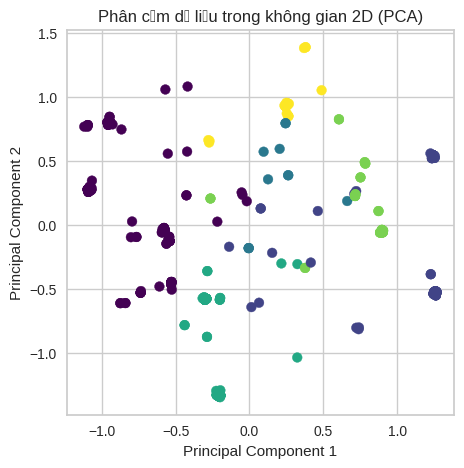

In [ ]:
# Giảm chiều dữ liệu về 2 chiều bằng PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_cluster_pca)
# Tạo DataFrame mới sau khi giảm chiều
df_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])

# Thêm cột cụm vào DataFrame
df_2d['cluster'] = data_cluster_hac_comp['cluster']  # labels là kết quả của quá trình phân cụm

# Biểu đồ Scatter Plot
plt.figure(figsize = (5, 5))
plt.scatter(df_2d['PC1'], df_2d['PC2'], c=df_2d['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **4. Quan sát các biến mục tiêu**

In [ ]:
data_after_cluster = data.copy()
data_after_cluster['Cluster'] = data_cluster_kmeans['cluster']

In [ ]:
data_after_cluster

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Cluster
0,Male,27,Software Engineer,6.1,6.0,42.0,6,Overweight,Tăng HA giai đoạn 1,77,4200,No,4
1,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,No,2
2,Male,28,Doctor,6.2,6.0,60.0,8,Normal Weight,HA Cao,75,10000,No,2
3,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Yes,4
4,Male,28,Sales Representative,5.9,4.0,30.0,8,Obese,Tăng HA giai đoạn 2,85,3000,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes,1
370,Female,59,Nurse,8.0,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes,1
371,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes,1
372,Female,59,Nurse,8.1,9.0,75.0,3,Overweight,Tăng HA giai đoạn 2,68,7000,Yes,1


**a. Quality of Sleep**

In [ ]:
# Tạo dữ liệu mẫu
select_column = ['Quality of Sleep', 'Cluster']
df = data_after_cluster[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Cluster', columns='Quality of Sleep', aggfunc=len, fill_value=0)
print(pivot_table)

Quality of Sleep  4.0  5.0  6.0  7.0  8.0  9.0
Cluster                                       
0                   0    0    0    3   61    0
1                   0    4   33    1    0   33
2                   0    0   33   32    1    0
3                   0    0    1    1   46   36
4                   5    3   37   41    1    2


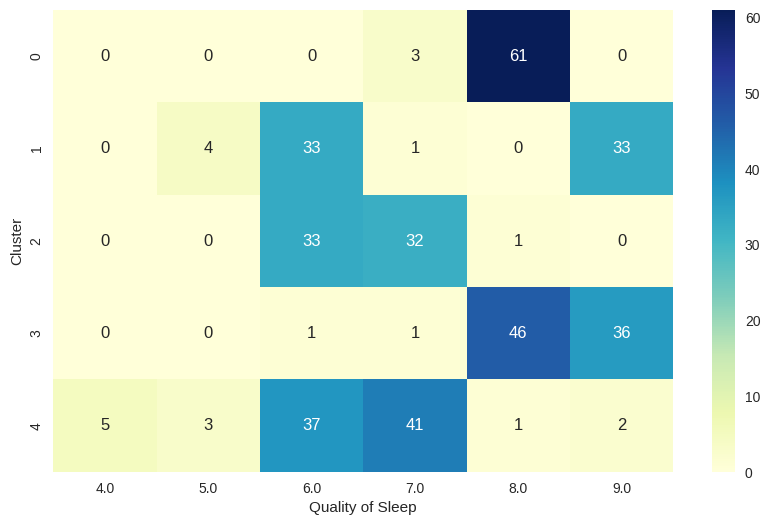

In [ ]:
# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

**b. Stress Level**

In [ ]:
# Tạo dữ liệu mẫu
select_column = ['Stress Level', 'Cluster']
df = data_after_cluster[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Cluster', columns='Stress Level', aggfunc=len, fill_value=0)
print(pivot_table)

Stress Level   3   4   5   6   7   8
Cluster                             
0              0   0  60   4   0   0
1             31   2   0   2   4  32
2              0   0   0  33   0  33
3             38  42   1   2   1   0
4              2  26   6   5  45   5


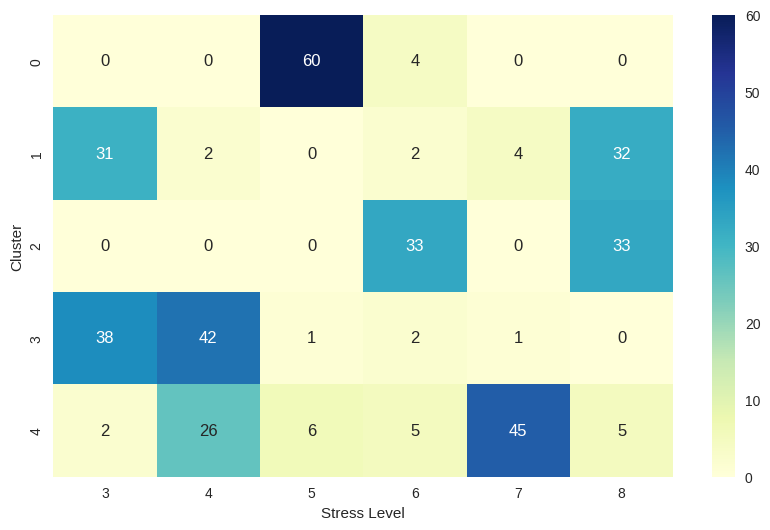

In [ ]:
# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

**c. Sleep Duration**

In [ ]:
result = data_after_cluster.groupby(['Cluster'])['Sleep Duration'].median().reset_index().sort_values(by='Sleep Duration', ascending=False)
# Hiển thị số lượng của từng giá trị Cluster
Cluster_counts = data_after_cluster['Cluster'].value_counts()
# Kết hợp kết quả với số lượng Cluster
result = result.merge(Cluster_counts, left_on='Cluster', right_index=True)
result = result.drop('Cluster_x', axis=1)
result

,Cluster,Sleep Duration,Cluster_y
0,0,7.6,64
3,3,7.5,84
2,2,6.7,66
1,1,6.5,71
4,4,6.5,89


In [ ]:
result = data_after_cluster.groupby(['Cluster'])['Sleep Duration'].mean().reset_index().sort_values(by='Sleep Duration', ascending=False)
# Hiển thị số lượng của từng giá trị Cluster
Cluster_counts = data_after_cluster['Cluster'].value_counts()
# Kết hợp kết quả với số lượng Cluster
result = result.merge(Cluster_counts, left_on='Cluster', right_index=True)
result = result.drop('Cluster_x', axis=1)
result

,Cluster,Sleep Duration,Cluster_y
3,3,7.730952,84
0,0,7.498437,64
1,1,7.045070,71
2,2,6.883333,66
4,4,6.548315,89


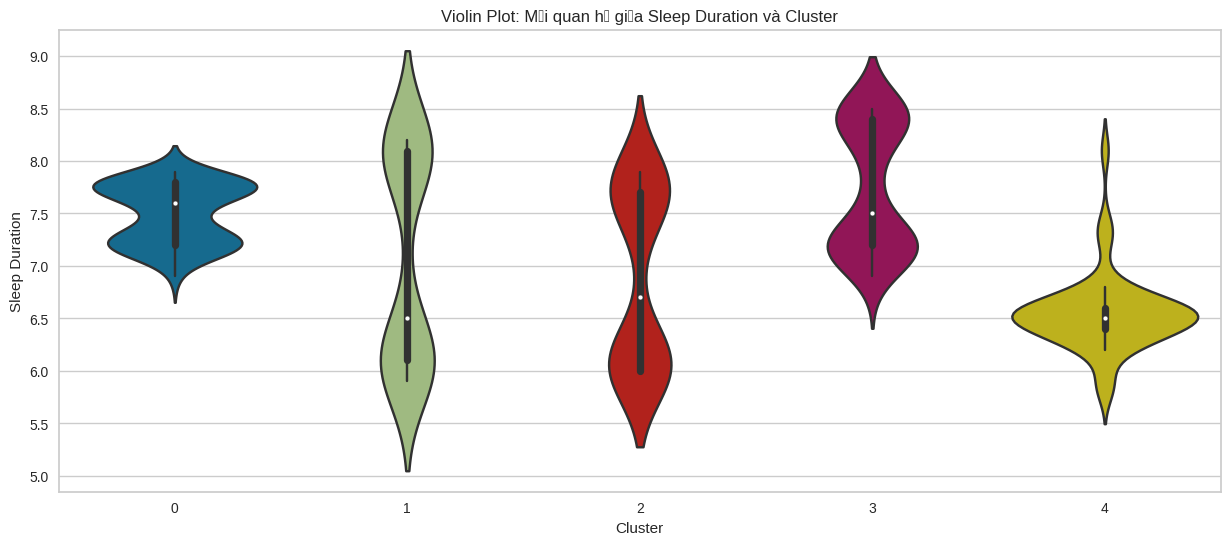

In [ ]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Cluster', y='Sleep Duration', data=data_after_cluster)
plt.xlabel('Cluster')
plt.ylabel('Sleep Duration')
plt.title('Violin Plot: Mối quan hệ giữa Sleep Duration và Cluster')
plt.show()

**d. Sleep Disorder**

In [ ]:
# Tạo dữ liệu mẫu
select_column = ['Sleep Disorder', 'Cluster']
df = data_after_cluster[select_column]

# Tạo pivot table
pivot_table = pd.pivot_table(df, index='Cluster', columns='Sleep Disorder', aggfunc=len, fill_value=0)
print(pivot_table)

Sleep Disorder  No  Yes
Cluster                
0               58    6
1                7   64
2               63    3
3               82    2
4               10   79


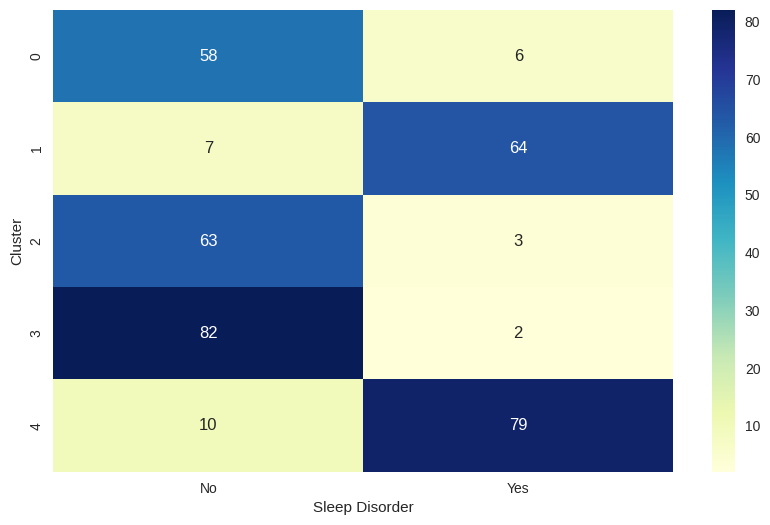

In [ ]:
# Tạo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## **II. Phân lớp**

### **1. Tiền xử lý trước phân lớp**

In [ ]:
# Copy bộ dữ liệu hiện tại để dùng cho việc phân lớp
data_classify = data.copy()

In [ ]:
data_classify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    object 
 5   Physical Activity Level  374 non-null    float64
 6   Stress Level             374 non-null    object 
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 35.2+ KB


**Loại bỏ đặc trưng**

In [ ]:
selected_columns = ['Quality of Sleep', 'Heart Rate', 'Daily Steps', 'Gender', 'Physical Activity Level']
data_classify.drop(selected_columns, axis=1, inplace=True)

In [ ]:
data_classify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             374 non-null    int64  
 1   Occupation      374 non-null    object 
 2   Sleep Duration  374 non-null    float64
 3   Stress Level    374 non-null    object 
 4   BMI Category    374 non-null    object 
 5   Blood Pressure  374 non-null    object 
 6   Sleep Disorder  374 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 20.6+ KB


In [ ]:
data_classify

,Age,Occupation,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Sleep Disorder
0,27,Software Engineer,6.1,6,Overweight,Tăng HA giai đoạn 1,No
1,28,Doctor,6.2,8,Normal Weight,HA Cao,No
2,28,Doctor,6.2,8,Normal Weight,HA Cao,No
3,28,Sales Representative,5.9,8,Obese,Tăng HA giai đoạn 2,Yes
4,28,Sales Representative,5.9,8,Obese,Tăng HA giai đoạn 2,Yes
...,...,...,...,...,...,...,...
369,59,Nurse,8.1,3,Overweight,Tăng HA giai đoạn 2,Yes
370,59,Nurse,8.0,3,Overweight,Tăng HA giai đoạn 2,Yes
371,59,Nurse,8.1,3,Overweight,Tăng HA giai đoạn 2,Yes
372,59,Nurse,8.1,3,Overweight,Tăng HA giai đoạn 2,Yes


**Xử lý cho các mô hình không cần chuẩn hóa**

In [ ]:
data_classify_no_standard = data_classify.copy()

**Mã hóa**

In [ ]:
# Stress Level
data_classify_no_standard['Stress Level'] = data_classify_no_standard['Stress Level'].astype('int64')
# BMI Category
data_classify_no_standard['BMI Category']=data_classify_no_standard['BMI Category'].replace({'Normal Weight': 0})
data_classify_no_standard['BMI Category']=data_classify_no_standard['BMI Category'].replace({'Overweight': 1})
data_classify_no_standard['BMI Category']=data_classify_no_standard['BMI Category'].replace({'Obese': 2})
# Blood Pressure
data_classify_no_standard['Blood Pressure']=data_classify_no_standard['Blood Pressure'].replace({'HA Bình thường': 0})
data_classify_no_standard['Blood Pressure']=data_classify_no_standard['Blood Pressure'].replace({'HA Cao': 1})
data_classify_no_standard['Blood Pressure']=data_classify_no_standard['Blood Pressure'].replace({'Tăng HA giai đoạn 1': 2})
data_classify_no_standard['Blood Pressure']=data_classify_no_standard['Blood Pressure'].replace({'Tăng HA giai đoạn 2': 3})
# Occupation
# Sleep Disorder
df_encoded = pd.get_dummies(data_classify_no_standard, columns=['Occupation', 'Sleep Disorder'], prefix=['Occupation', 'Sleep Disorder'], drop_first= True)
data_classify_no_standard = pd.concat([data_classify_no_standard, df_encoded], axis=1)

# Xóa các cột ban đầu và bỏ bớt các cột nhị phân
selected_columns = ['Occupation', 'Sleep Disorder']
data_classify_no_standard.drop(selected_columns, axis=1, inplace=True)
# Xóa các cột trung
# Xóa các cột trùng nhau
data_classify_no_standard = data_classify_no_standard.T.drop_duplicates().T

In [ ]:
data_classify_no_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    float64
 1   Sleep Duration                   374 non-null    float64
 2   Stress Level                     374 non-null    float64
 3   BMI Category                     374 non-null    float64
 4   Blood Pressure                   374 non-null    float64
 5   Occupation_Doctor                374 non-null    float64
 6   Occupation_Engineer              374 non-null    float64
 7   Occupation_Lawyer                374 non-null    float64
 8   Occupation_Manager               374 non-null    float64
 9   Occupation_Nurse                 374 non-null    float64
 10  Occupation_Sales Representative  374 non-null    float64
 11  Occupation_Salesperson           374 non-null    float64
 12  Occupation_Scientist  

In [ ]:
data_classify_no_standard

,Age,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Yes
0,27.0,6.1,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28.0,6.2,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,6.2,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,5.9,8.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,28.0,5.9,8.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59.0,8.1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
370,59.0,8.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
371,59.0,8.1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
372,59.0,8.1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**Xử lý cho các mô hình cần chuẩn hóa**

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_classify_no_standard)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
data_classify_standard = pd.DataFrame(scaled_data, columns=data_classify_no_standard.columns)

In [ ]:
data_classify_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    float64
 1   Sleep Duration                   374 non-null    float64
 2   Stress Level                     374 non-null    float64
 3   BMI Category                     374 non-null    float64
 4   Blood Pressure                   374 non-null    float64
 5   Occupation_Doctor                374 non-null    float64
 6   Occupation_Engineer              374 non-null    float64
 7   Occupation_Lawyer                374 non-null    float64
 8   Occupation_Manager               374 non-null    float64
 9   Occupation_Nurse                 374 non-null    float64
 10  Occupation_Sales Representative  374 non-null    float64
 11  Occupation_Salesperson           374 non-null    float64
 12  Occupation_Scientist  

In [ ]:
data_classify_standard

,Age,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_Yes
0,0.00000,0.111111,0.6,0.5,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.03125,0.148148,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03125,0.148148,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03125,0.037037,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.03125,0.037037,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.00000,0.851852,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
370,1.00000,0.814815,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
371,1.00000,0.851852,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
372,1.00000,0.851852,0.0,0.5,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### **2. Hàm đánh giá**

In [ ]:
# Hàm đánh giá
def classification_eval(y_test, y_pred):
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

### **3. Decision Tree**

In [ ]:
data_classify_tree = data_classify_no_standard.copy()

In [ ]:
X = data_classify_tree.drop('Sleep Disorder_Yes', axis = 1)
y = data_classify_tree['Sleep Disorder_Yes']

print(pd.concat([X, y], axis = 1).head())

    Age  Sleep Duration  Stress Level  BMI Category  Blood Pressure  \
0  27.0             6.1           6.0           1.0             2.0   
1  28.0             6.2           8.0           0.0             1.0   
2  28.0             6.2           8.0           0.0             1.0   
3  28.0             5.9           8.0           2.0             3.0   
4  28.0             5.9           8.0           2.0             3.0   

   Occupation_Doctor  Occupation_Engineer  Occupation_Lawyer  \
0                0.0                  0.0                0.0   
1                1.0                  0.0                0.0   
2                1.0                  0.0                0.0   
3                0.0                  0.0                0.0   
4                0.0                  0.0                0.0   

   Occupation_Manager  Occupation_Nurse  Occupation_Sales Representative  \
0                 0.0               0.0                              0.0   
1                 0.0               

In [ ]:
# Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
# Tạo mô hình cây quyết định
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Thiết lập các tham số cần thử nghiệm
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

# Khởi tạo GridSearchCV với mô hình, tham số và số lượng fold trong
# cross-validation (cv)
grid_search_tree = GridSearchCV(estimator=decision_tree_model,
                                param_grid=param_grid,
                                cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# In ra siêu tham số tốt nhất
print("Best Parameters:", grid_search_tree.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Kiểm thử mô hình
y_pred = grid_search_tree.best_estimator_.predict(X_test)

In [ ]:
scores = classification_eval(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)

# Hiển thị giá trị các chỉ số
print(f'Accuracy  = {(scores[0] * 100):.1f}%')
print(f'Precision = {(scores[1] * 100):.1f}%')
print(f'Recall    = {(scores[2] * 100):.1f}%')
print(f'F1        = {(scores[3] * 100):.1f}%')
print(f'AUC       = {(auc * 100):.1f}%')

Accuracy  = 89.3%
Precision = 89.7%
Recall    = 83.9%
F1        = 86.7%
AUC       = 88.5%


In [ ]:
# Ma trận nhầm lẫn
print("* Sleep Disorder_Yes = 0 -->", y_test[y_test == 0].size, 'trường hợp')
print("* Sleep Disorder_Yes = 1 -->", y_test[y_test == 1].size, 'trường hợp')
print(confusion_matrix(y_test, y_pred))

* Sleep Disorder_Yes = 0 --> 44 trường hợp
* Sleep Disorder_Yes = 1 --> 31 trường hợp
[[41  3]
 [ 5 26]]


In [ ]:
# Đánh giá mô hình bằng k-Fold Cross Validation
model   = DecisionTreeClassifier(random_state=42, criterion = 'entropy',
                                 max_depth = 5, max_features = None,
                                 min_samples_leaf = 1, min_samples_split = 2)

kfold   = KFold(n_splits = 10)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(f'Accuracy = {results.mean()*100.0:.2f}%; std = {results.std()*100.0:.2f}%')

Accuracy = 91.70%; std = 3.70%


### **4. K-NN**

In [ ]:
data_classify_knn = data_classify_standard.copy()

In [ ]:
X = data_classify_knn.drop('Sleep Disorder_Yes', axis = 1)
y = data_classify_knn['Sleep Disorder_Yes']

print(pd.concat([X, y], axis = 1).head())

       Age  Sleep Duration  Stress Level  BMI Category  Blood Pressure  \
0  0.00000        0.111111           0.6           0.5        0.666667   
1  0.03125        0.148148           1.0           0.0        0.333333   
2  0.03125        0.148148           1.0           0.0        0.333333   
3  0.03125        0.037037           1.0           1.0        1.000000   
4  0.03125        0.037037           1.0           1.0        1.000000   

   Occupation_Doctor  Occupation_Engineer  Occupation_Lawyer  \
0                0.0                  0.0                0.0   
1                1.0                  0.0                0.0   
2                1.0                  0.0                0.0   
3                0.0                  0.0                0.0   
4                0.0                  0.0                0.0   

   Occupation_Manager  Occupation_Nurse  Occupation_Sales Representative  \
0                 0.0               0.0                              0.0   
1                 

In [ ]:
# Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
# Xây dựng mô hình kNN Classification
k   = int(pow(X_train.shape[0], 1/2) / 2)

# Khởi tạo mô hình K-NN
knn_model = KNeighborsClassifier(n_neighbors=k)

# Thiết lập các tham số cần tìm kiếm
param_grid = {'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Khởi tạo GridSearchCV với mô hình, tham số và số lượng fold trong cross-validation (cv)
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                               cv=5, scoring='accuracy')

# Huấn luyện GridSearchCV trên dữ liệu
grid_search_knn.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search_knn.best_params_)

Best Parameters: {'algorithm': 'auto', 'p': 1, 'weights': 'uniform'}


In [ ]:
# Kiểm thử mô hình
y_pred = grid_search_knn.best_estimator_.predict(X_test)

In [ ]:
scores = classification_eval(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)

# Hiển thị giá trị các chỉ số
print(f'Accuracy  = {(scores[0] * 100):.1f}%')
print(f'Precision = {(scores[1] * 100):.1f}%')
print(f'Recall    = {(scores[2] * 100):.1f}%')
print(f'F1        = {(scores[3] * 100):.1f}%')
print(f'AUC       = {(auc * 100):.1f}%')

Accuracy  = 89.3%
Precision = 87.1%
Recall    = 87.1%
F1        = 87.1%
AUC       = 89.0%


In [ ]:
# Ma trận nhầm lẫn
print("* Sleep Disorder_Yes = 0 -->", y_test[y_test == 0].size, 'trường hợp')
print("* Sleep Disorder_Yes = 1 -->", y_test[y_test == 1].size, 'trường hợp')
print(confusion_matrix(y_test, y_pred))

* Sleep Disorder_Yes = 0 --> 44 trường hợp
* Sleep Disorder_Yes = 1 --> 31 trường hợp
[[40  4]
 [ 4 27]]


In [ ]:
# Đánh giá mô hình bằng k-Fold Cross Validation
model   = KNeighborsClassifier(n_neighbors=k, algorithm = 'auto',
                               p = 1, weights = 'uniform')

kfold   = KFold(n_splits = 10)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(f'Accuracy = {results.mean()*100.0:.2f}%; std = {results.std()*100.0:.2f}%')

Accuracy = 90.14%; std = 4.08%


### **5. SVM**

In [ ]:
data_classify_svm = data_classify_standard.copy()

In [ ]:
X = data_classify_svm.drop('Sleep Disorder_Yes', axis = 1)
y = data_classify_svm['Sleep Disorder_Yes']

print(pd.concat([X, y], axis = 1).head())

       Age  Sleep Duration  Stress Level  BMI Category  Blood Pressure  \
0  0.00000        0.111111           0.6           0.5        0.666667   
1  0.03125        0.148148           1.0           0.0        0.333333   
2  0.03125        0.148148           1.0           0.0        0.333333   
3  0.03125        0.037037           1.0           1.0        1.000000   
4  0.03125        0.037037           1.0           1.0        1.000000   

   Occupation_Doctor  Occupation_Engineer  Occupation_Lawyer  \
0                0.0                  0.0                0.0   
1                1.0                  0.0                0.0   
2                1.0                  0.0                0.0   
3                0.0                  0.0                0.0   
4                0.0                  0.0                0.0   

   Occupation_Manager  Occupation_Nurse  Occupation_Sales Representative  \
0                 0.0               0.0                              0.0   
1                 

In [ ]:
# Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
# Khởi tạo mô hình SVM
svm_model = SVC()

# Thiết lập các tham số cần tìm kiếm
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': [0.1, 1, 'scale', 'auto'],
              'degree': [2, 3, 4],
              'coef0': [0.0, 1.0, 2.0],
              'shrinking': [True, False]}

# Khởi tạo GridSearchCV với mô hình, tham số và số lượng fold trong cross-validation (cv)
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                               cv=5, scoring='accuracy')

# Huấn luyện GridSearchCV trên dữ liệu
grid_search_svm.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best Parameters:", grid_search_svm.best_params_)

Best Parameters: {'C': 0.1, 'coef0': 0.0, 'degree': 4, 'gamma': 1, 'kernel': 'poly', 'shrinking': True}


In [ ]:
# Kiểm thử mô hình
y_pred = grid_search_svm.best_estimator_.predict(X_test)

In [ ]:
scores = classification_eval(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)

# Hiển thị giá trị các chỉ số
print(f'Accuracy  = {(scores[0] * 100):.1f}%')
print(f'Precision = {(scores[1] * 100):.1f}%')
print(f'Recall    = {(scores[2] * 100):.1f}%')
print(f'F1        = {(scores[3] * 100):.1f}%')
print(f'AUC       = {(auc * 100):.1f}%')

Accuracy  = 90.7%
Precision = 90.0%
Recall    = 87.1%
F1        = 88.5%
AUC       = 90.1%


In [ ]:
# Ma trận nhầm lẫn
print("* Sleep Disorder_Yes = 0 -->", y_test[y_test == 0].size, 'trường hợp')
print("* Sleep Disorder_Yes = 1 -->", y_test[y_test == 1].size, 'trường hợp')
print(confusion_matrix(y_test, y_pred))

* Sleep Disorder_Yes = 0 --> 44 trường hợp
* Sleep Disorder_Yes = 1 --> 31 trường hợp
[[41  3]
 [ 4 27]]


In [ ]:
# Đánh giá mô hình bằng k-Fold Cross Validation
model   = SVC(C = 0.1, coef0 = 0.0, degree = 4, gamma = 1,
              kernel = 'poly', shrinking = True)

kfold   = KFold(n_splits = 10)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(f'Accuracy = {results.mean()*100.0:.2f}%; std = {results.std()*100.0:.2f}%')

Accuracy = 83.07%; std = 21.75%
